In [1]:
import SNIDsn
import SNIDdataset as snid
import numpy as np
import SNePCA

import plotly.plotly as ply
import plotly.graph_objs as go
import plotly.tools as tls

import matplotlib.pyplot as plt

import pandas

### Load preprocessed SNID datasets 

datasetX contains the SNID spectra for the phase range X +/- 5 days, where each SNe has only 1 spectrum in this phase range.  The spectrum with phase closest to X is chosen. All of the preprocessing has been applied (wavelength cut, smoothing, phase type, etc)

In [2]:
dataset0 = snid.loadPickle('../Data/DataProducts/dataset0.pickle')
dataset5 = snid.loadPickle('../Data/DataProducts/dataset5.pickle')
dataset10 = snid.loadPickle('../Data/DataProducts/dataset10.pickle')
dataset15 = snid.loadPickle('../Data/DataProducts/dataset15.pickle')

### Run PCA

In [3]:
snidPCA0 = SNePCA.SNePCA(dataset0, -5, 5)
snidPCA5 = SNePCA.SNePCA(dataset5, 0, 10)
snidPCA10 = SNePCA.SNePCA(dataset10, 5, 15)
snidPCA15 = SNePCA.SNePCA(dataset15, 10, 20)

In [4]:
snidPCA0.snidPCA()
snidPCA5.snidPCA()
snidPCA10.snidPCA()
snidPCA15.snidPCA()

Choose the arbitrary signs for the eigenspectra so that they are consistent across phases, and so that the eigenspectra features match H and He absorption features in the mean spectra.

In [5]:
snidPCA10.evecs[0] = -snidPCA10.evecs[0]

snidPCA5.evecs[1] = -snidPCA5.evecs[1]
snidPCA10.evecs[1] = -snidPCA10.evecs[1]
snidPCA15.evecs[1] = -snidPCA15.evecs[1]

snidPCA0.evecs[2] = -snidPCA0.evecs[2]
snidPCA5.evecs[2] = -snidPCA5.evecs[2]
snidPCA15.evecs[2] = -snidPCA15.evecs[2]

snidPCA0.evecs[3] = -snidPCA0.evecs[3]
snidPCA5.evecs[3] = -snidPCA5.evecs[3]
snidPCA10.evecs[3] = -snidPCA10.evecs[3]

snidPCA0.evecs[4] = -snidPCA0.evecs[4]

In [6]:
snidPCA0.calcPCACoeffs()
snidPCA5.calcPCACoeffs()
snidPCA10.calcPCACoeffs()
snidPCA15.calcPCACoeffs()

In [8]:
print(snidPCA0.pcaCoeffMatrix.shape)
print(snidPCA5.pcaCoeffMatrix.shape)
print(snidPCA10.pcaCoeffMatrix.shape)
print(snidPCA15.pcaCoeffMatrix.shape)

(55, 55)
(52, 52)
(56, 56)
(54, 54)


In [9]:
# Set colors for plots
snidPCA0.Ib_color = 'steelblue'
snidPCA5.Ib_color = 'steelblue'
snidPCA10.Ib_color = 'steelblue'
snidPCA15.Ib_color = 'steelblue'
snidPCA0.IIb_color = 'limegreen'
snidPCA5.IIb_color = 'limegreen'
snidPCA10.IIb_color = 'limegreen'
snidPCA15.IIb_color = 'limegreen'
snidPCA0.IcBL_color = 'darkgrey'
snidPCA5.IcBL_color = 'darkgrey'
snidPCA10.IcBL_color = 'darkgrey'
snidPCA15.IcBL_color = 'darkgrey'


snidPCA0.IIb_ellipse_color = 'green'
snidPCA5.IIb_ellipse_color = 'green'
snidPCA10.IIb_ellipse_color = 'green'
snidPCA15.IIb_ellipse_color = 'green'
snidPCA0.IcBL_ellipse_color = 'grey'
snidPCA5.IcBL_ellipse_color = 'grey'
snidPCA10.IcBL_ellipse_color = 'grey'
snidPCA15.IcBL_ellipse_color = 'grey'


# Reconstruction

The following plots show that PCA can reconstruct the original spectra in our dataset.

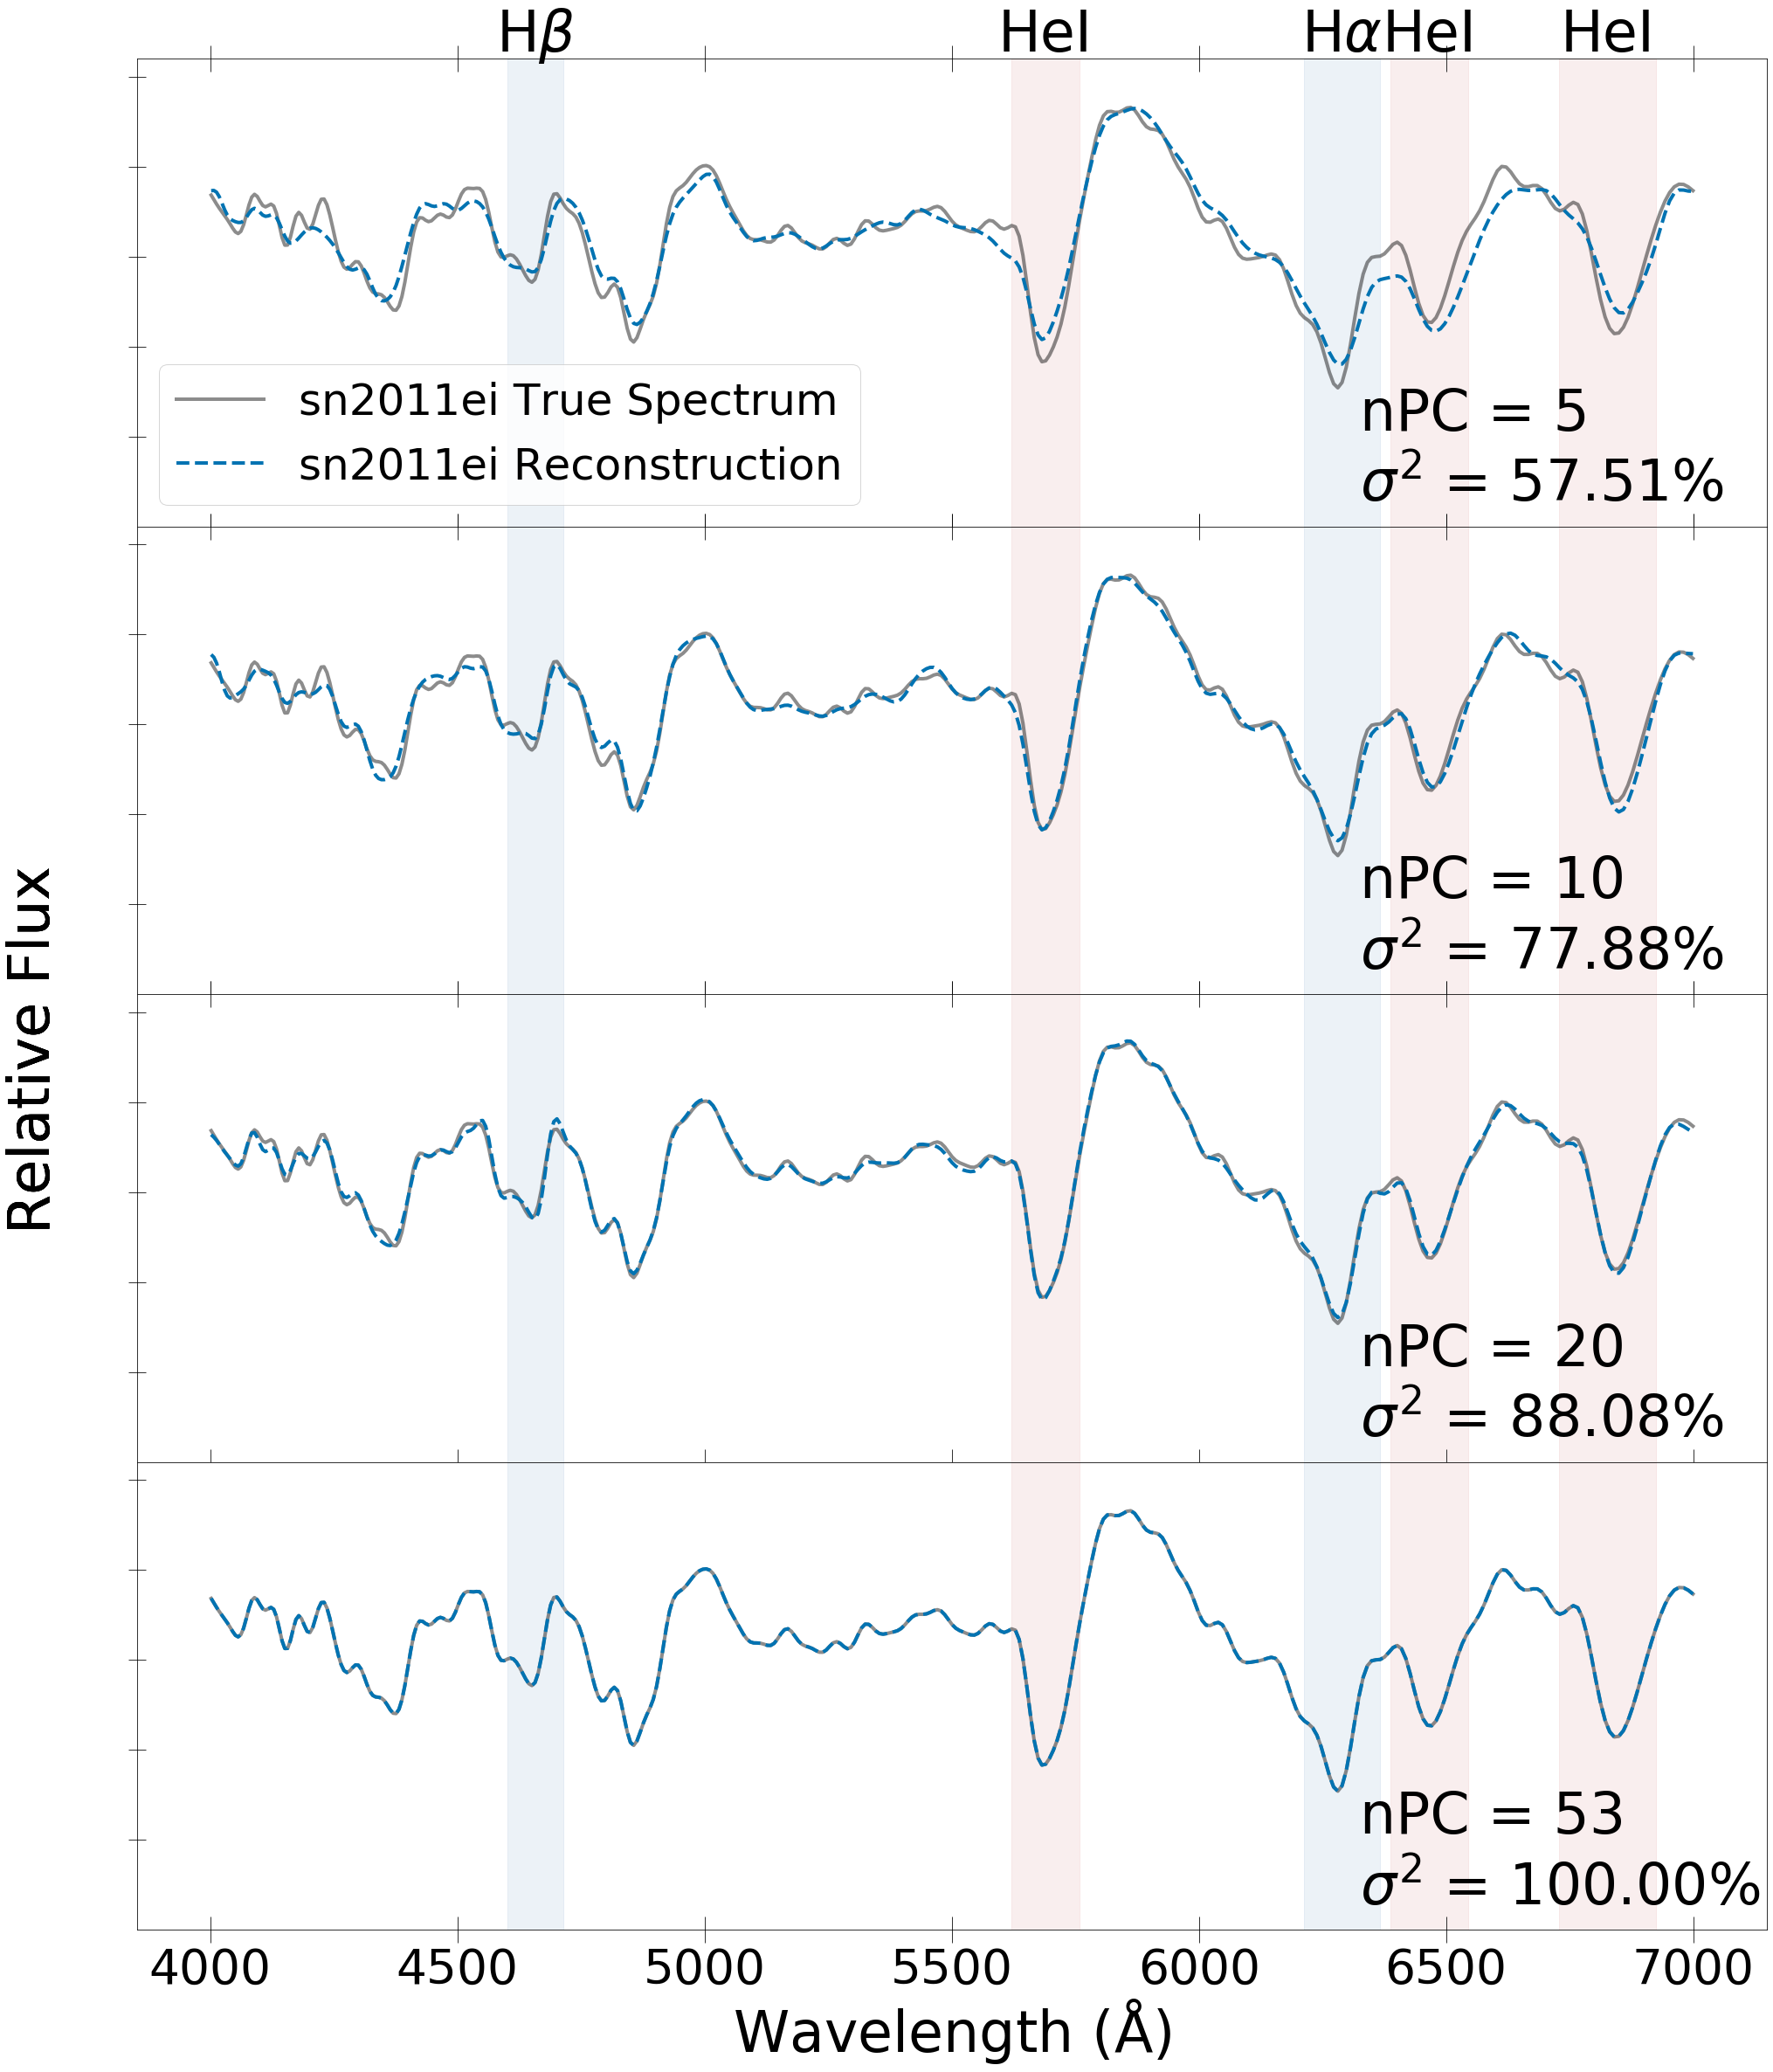

In [10]:
f,h=snidPCA15.reconstructSpectrumGrid((32,35),'sn2011ei', 'Ph13.0',3,[5,10,20,53],fontsize=65, leg_fontsize=50, ylim=(-1.6,1), dytick=0.5)

In [11]:
a=f.axes[0]
a.text(4000, 0.6,'$t_{V_{max}}=13.0$ days', fontsize=55)

Text(4000, 0.6, '$t_{V_{max}}=13.0$ days')

In [12]:
a=f.axes[-1]
from matplotlib.ticker import MultipleLocator
a.xaxis.set_minor_locator(MultipleLocator(100))

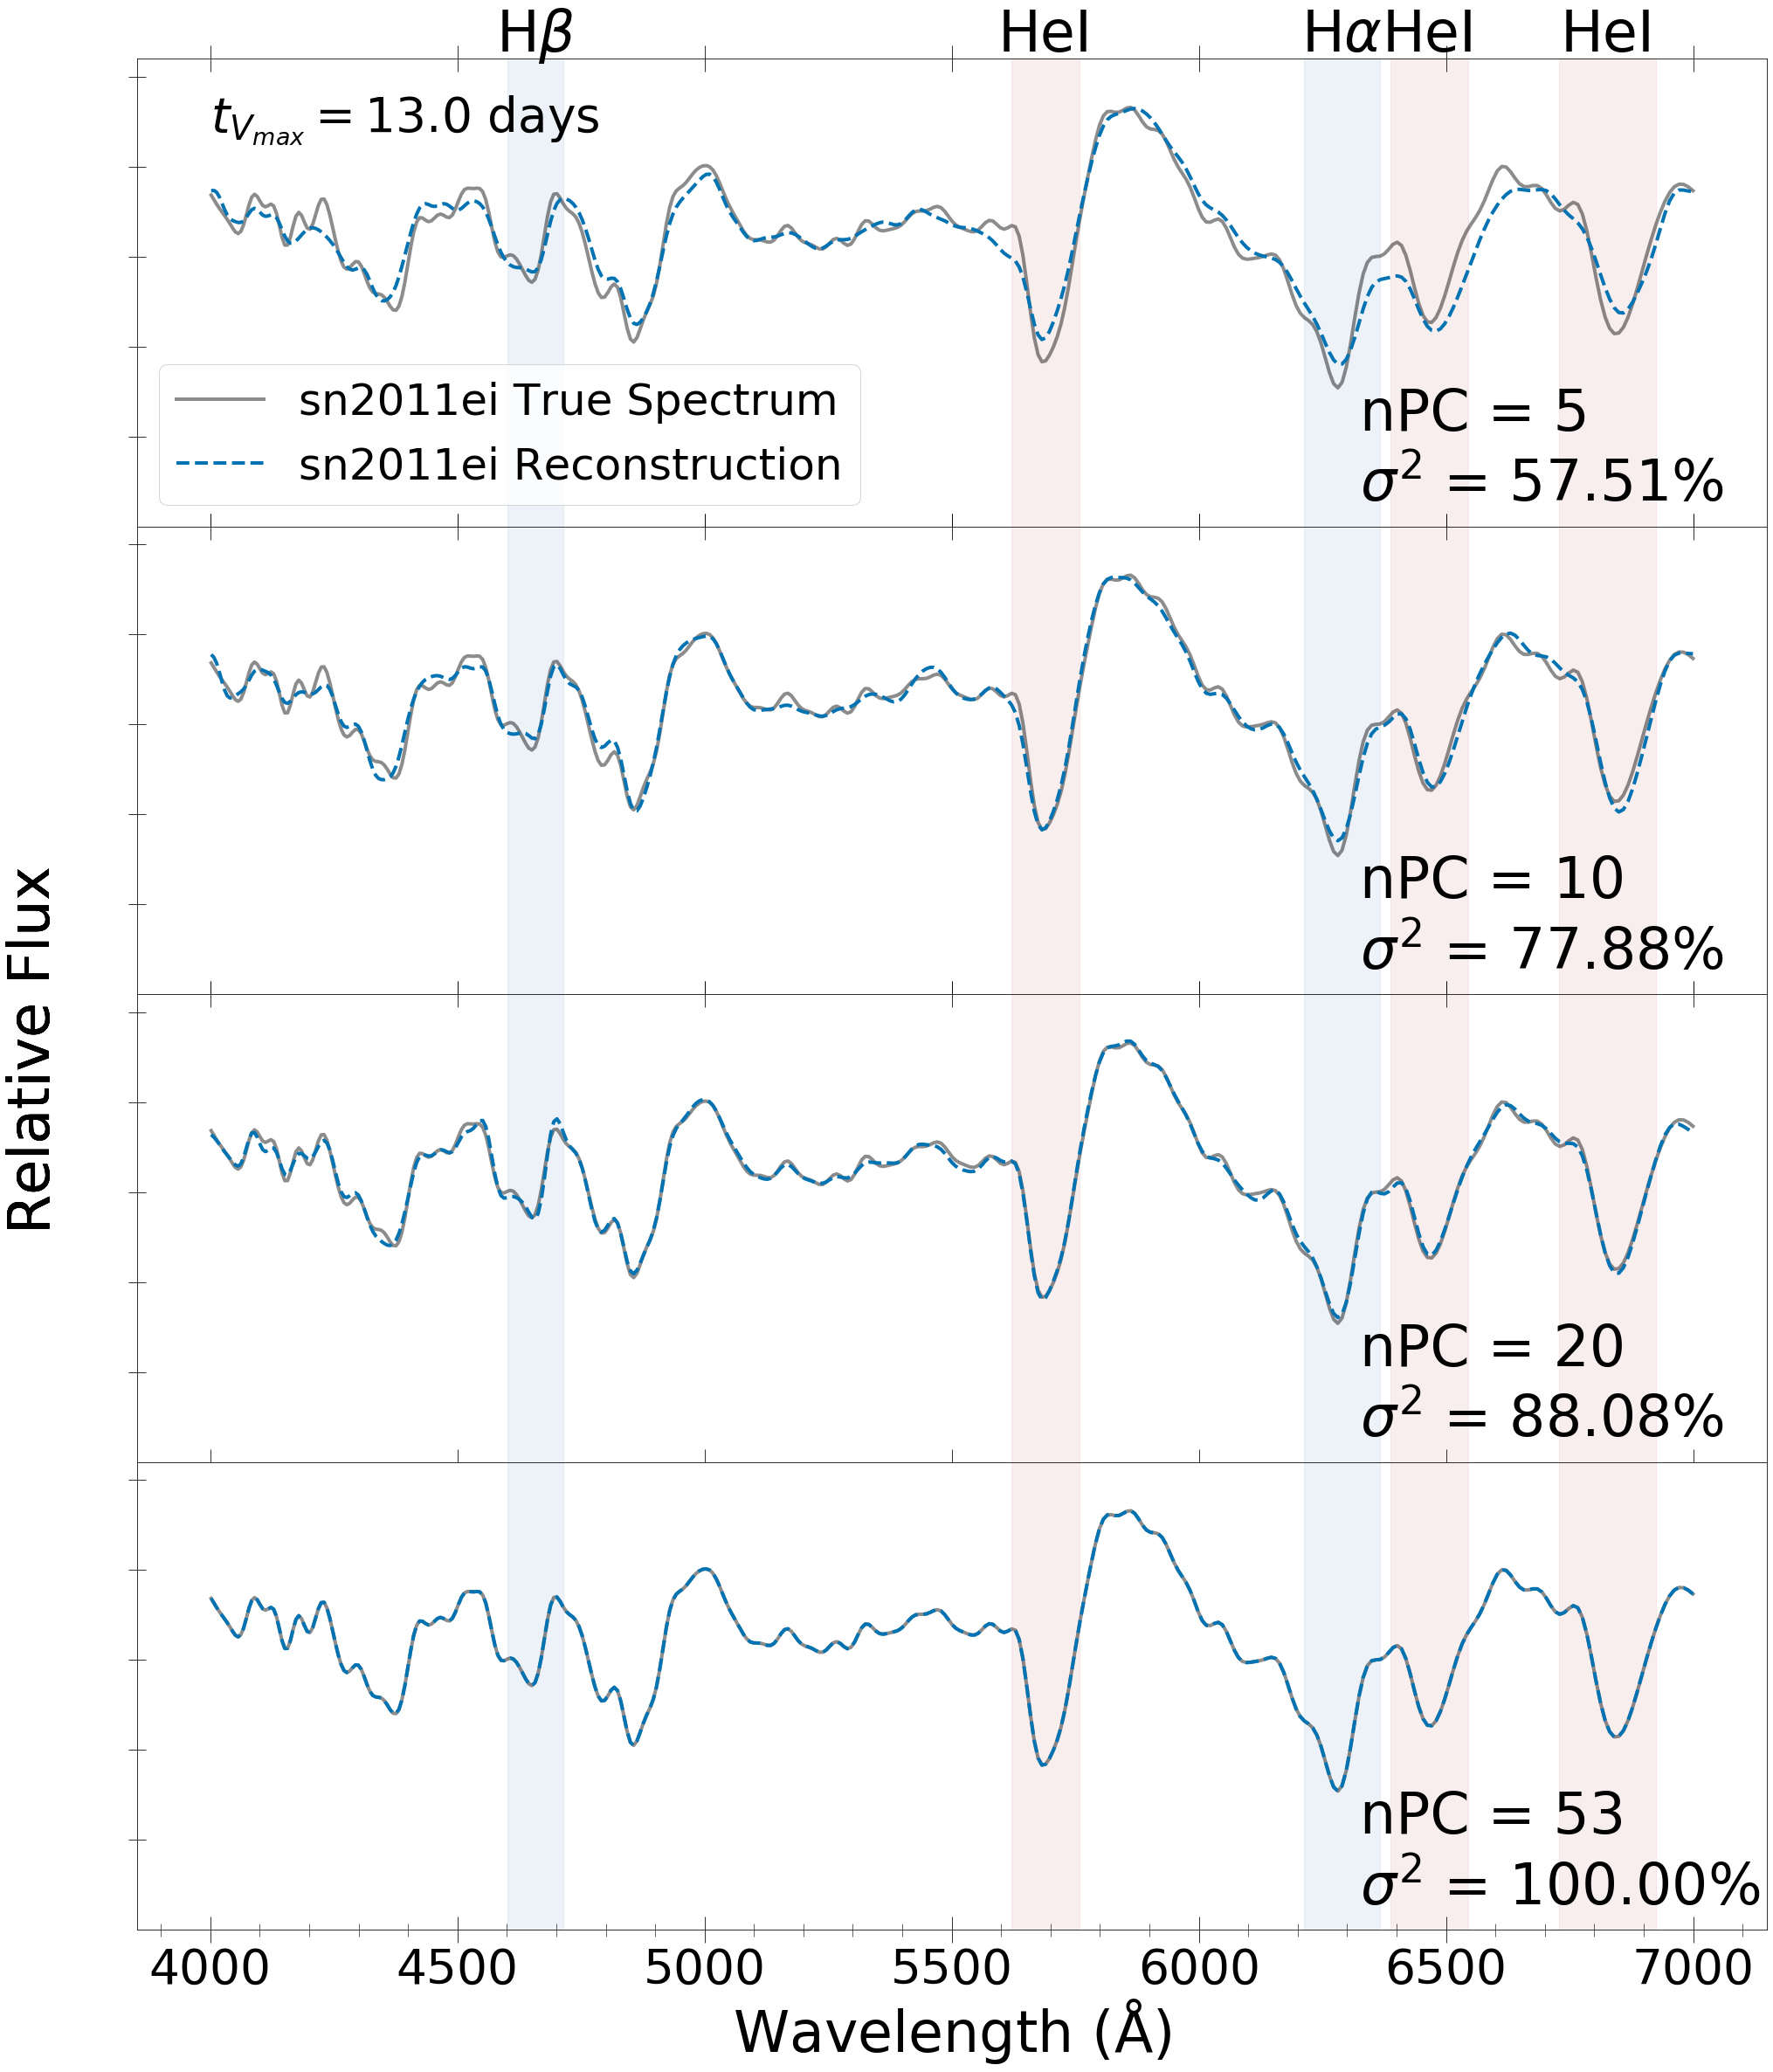

In [13]:
f

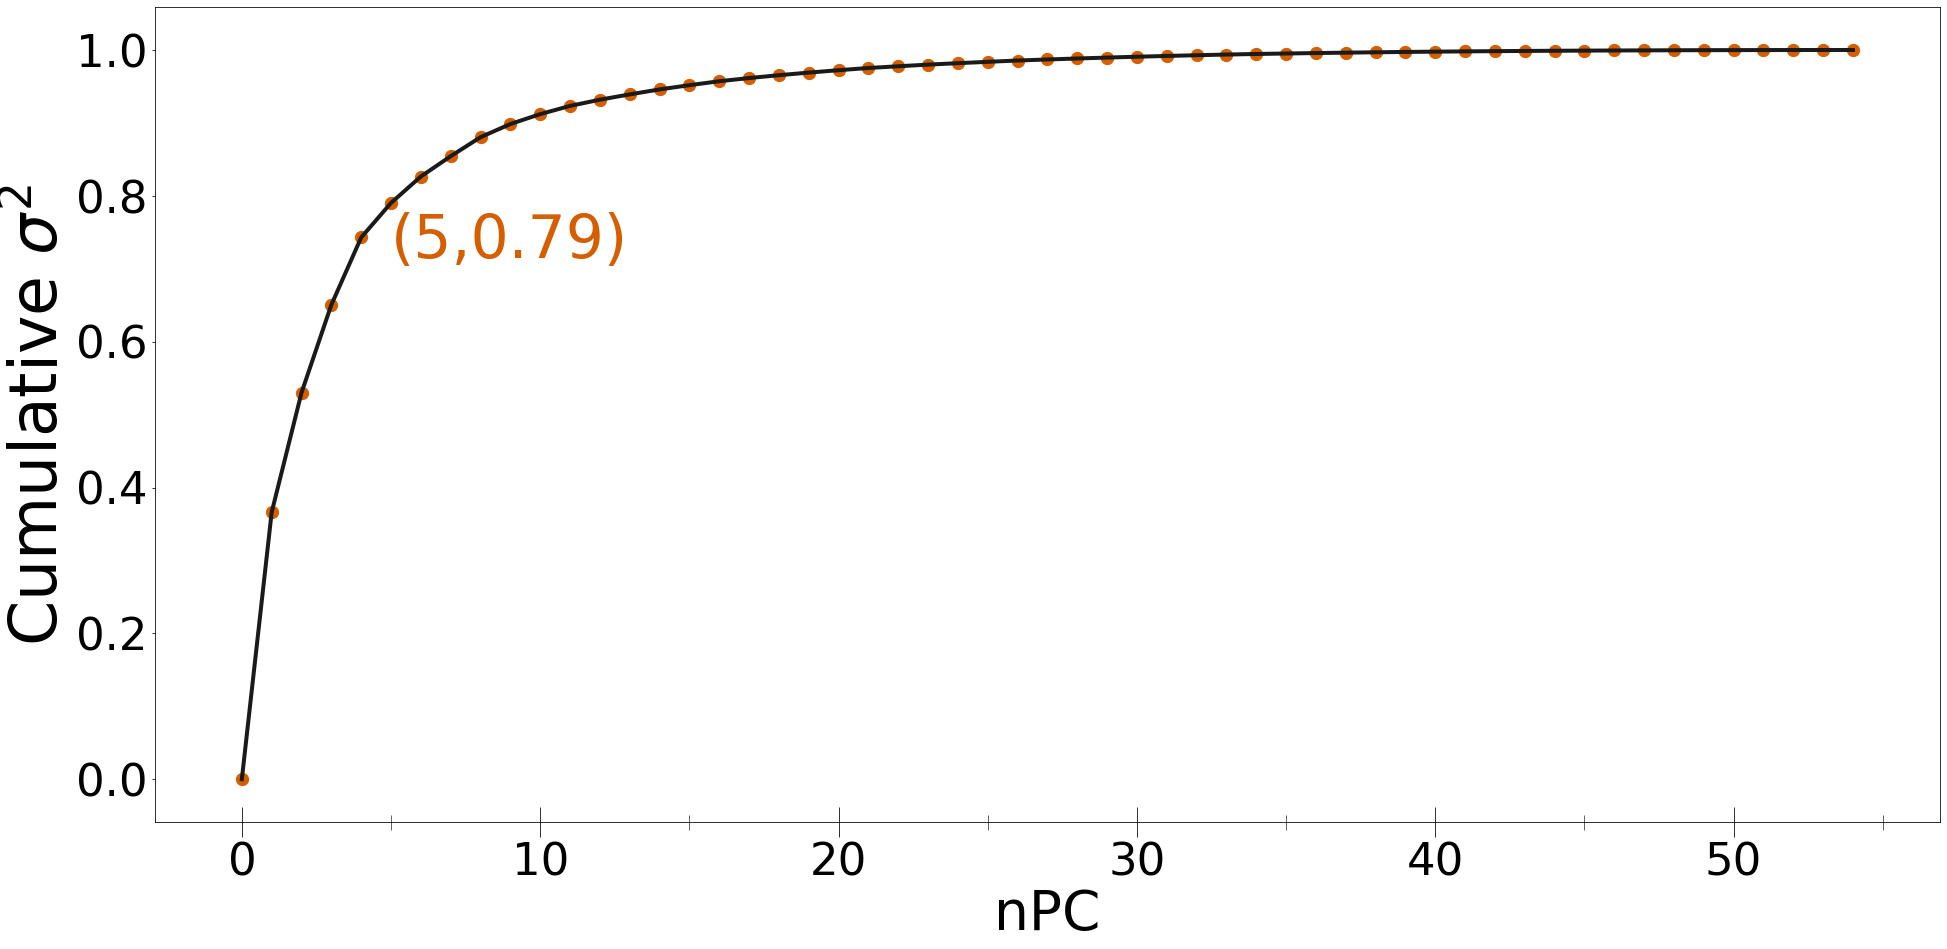

In [14]:
f, ax = snidPCA15.pcaCumPlot((32,15), fontsize=55)

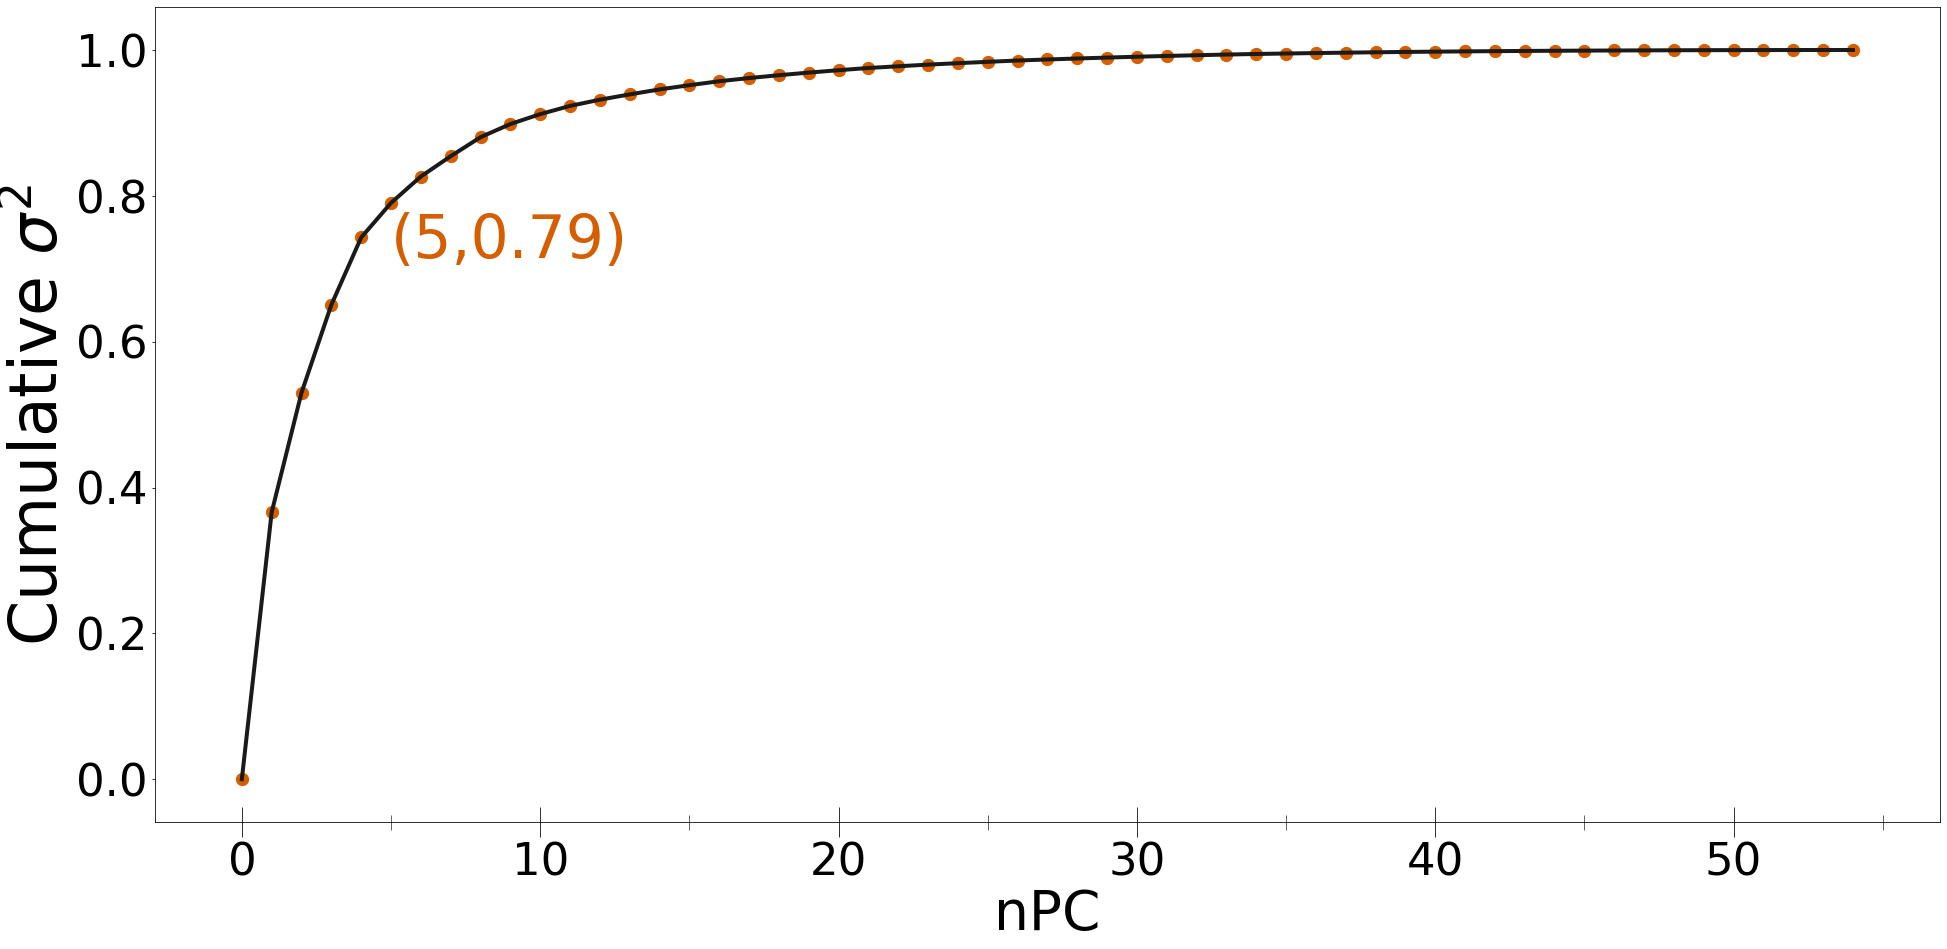

In [15]:
f

# Eigenspectra

Each panel of the following plot shows one of the first 5 eigenspectra in every phase range.  The eigenspectra signs are consistent across phases.

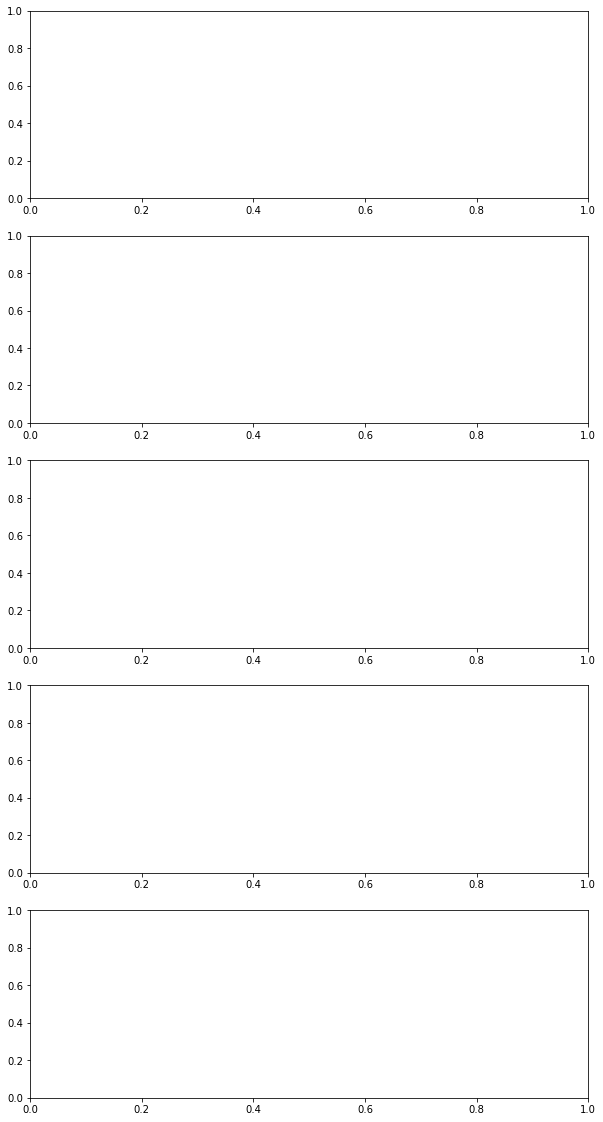

In [17]:
f, axs = plt.subplots(5,1,figsize=(10,20))

In [18]:
for i in range(5):
    ax = axs[i]
    ax.set_title('PCA%d Eigenspectra'%(i+1))
    ax.set_xlim((3800,7700))
    ax.set_yticks([])
    ax.plot(snidPCA0.wavelengths,snidPCA0.evecs[i]+2-0,'r',label='phase 0')
    ax.plot(snidPCA0.wavelengths,snidPCA5.evecs[i]+2-.5,'b',label='phase 5')
    ax.plot(snidPCA0.wavelengths,snidPCA10.evecs[i]+2-1,'c',label='phase 10')
    ax.plot(snidPCA0.wavelengths,snidPCA15.evecs[i]+2-1.5,'g',label='phase 15')
    
    #ax.plot(snidPCA20.wavelengths,snidPCA20.evecs[i]+2-2,'k',label='phase 20')
    #ax.plot(snidPCA25.wavelengths,snidPCA25.evecs[i]+2-2.5,'y',label='phase 25')
    
    ax.legend()

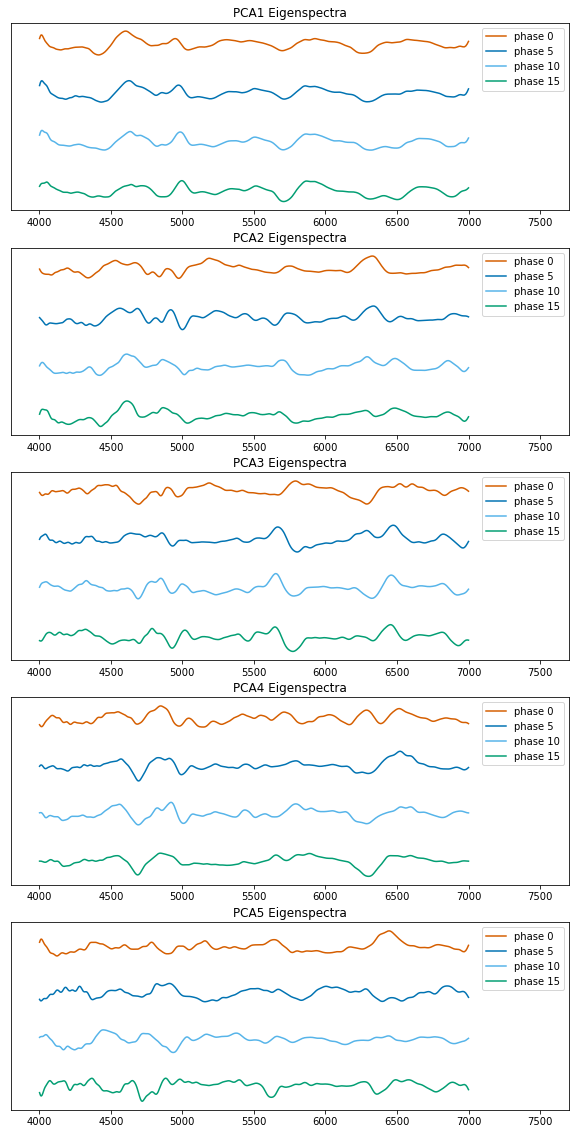

In [19]:
f

# Classification

The following cells construct a 4 panel plot, where each panel corresponds to a 2D projection of PCA space in a different phase range.

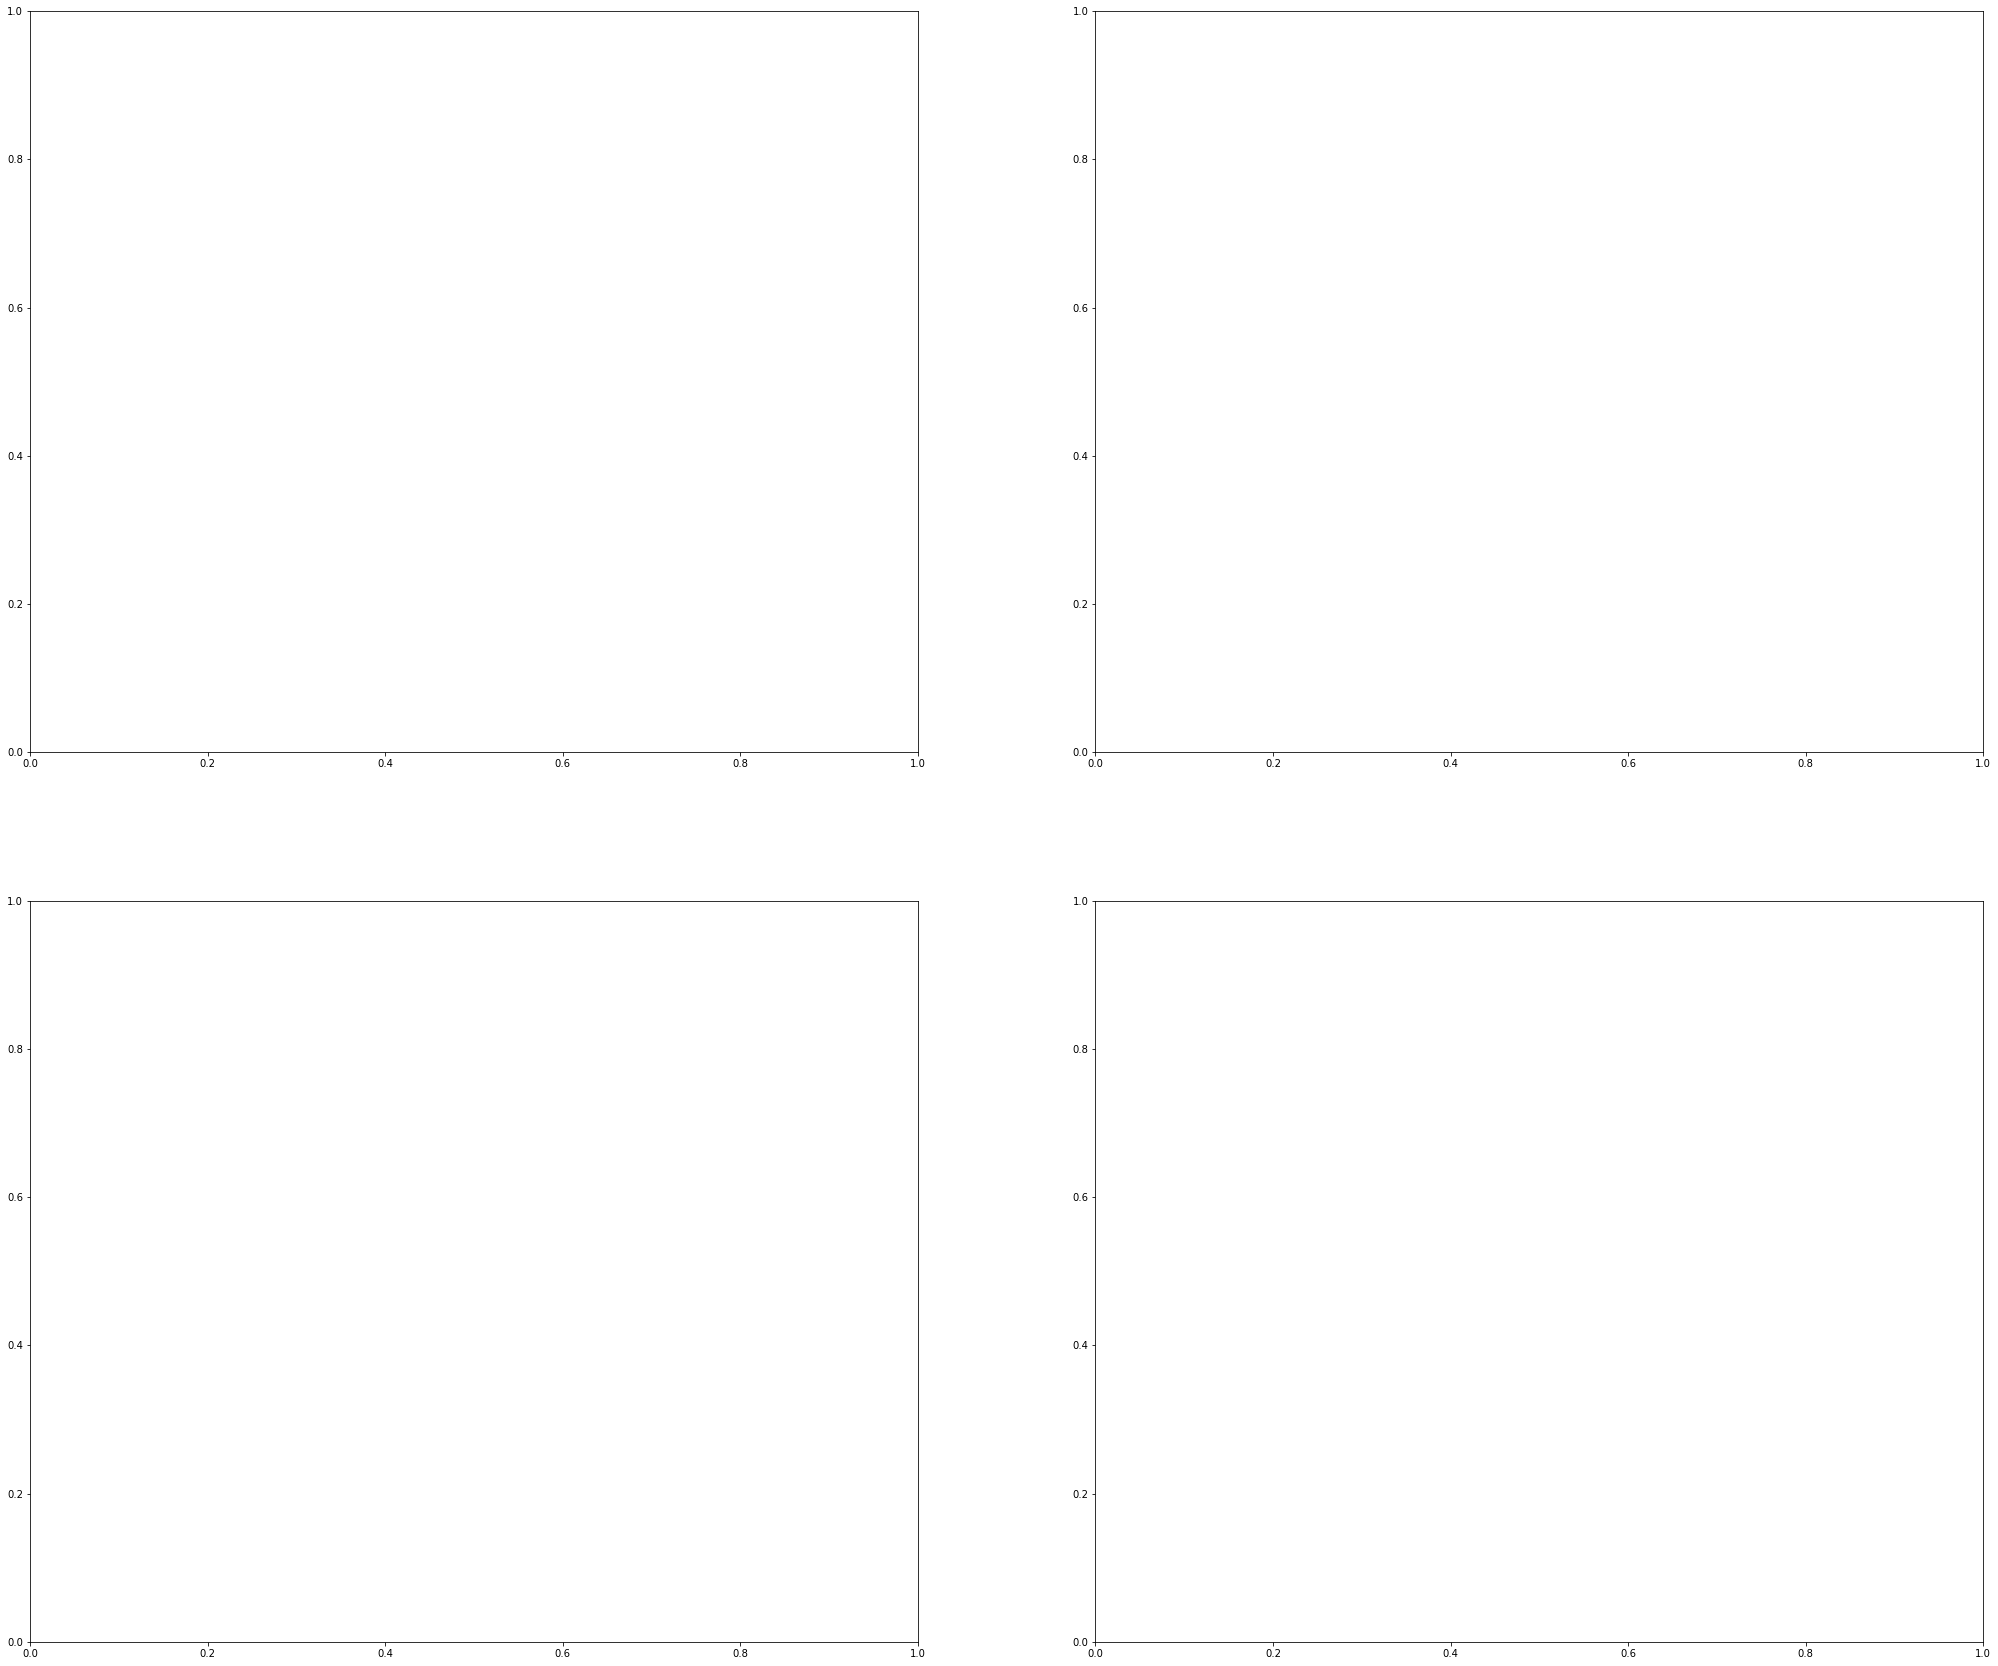

In [20]:
f_all, axs = plt.subplots(2,2,figsize=(35,30),gridspec_kw={'wspace':.2,'hspace':.2})

In [21]:
#Exclude Ib-pec and Ic-pec SNe
exclude = ['sn2007uy', 'sn2009er', 'sn2005ek']

In [22]:
svmsc=[]
f_all,svmsc,av0,std0=snidPCA0.pcaPlot(1,5,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,purity=True,
                                     excludeSNe=exclude, std_rad=1.0, svm=True, count=3, fig=f_all,
                                     ax=f_all.axes[0],ncv=50, markOutliers=True)
print(av0, std0)

['sn1998dt' 'sn1999dn' 'sn1999ex' 'sn2004gq' 'sn2005bf' 'sn2005hg'
 'sn2007ag' 'sn2007C' 'sn2007kj' 'sn2007Y' 'sn2008D' 'sn2009jf' 'sn2012P'
 'sn2013df' 'sn2016gkg' '11hs' 'sn1993J' 'sn1996cb' 'sn1998fa' 'sn2000H'
 'sn2004ff' 'sn2006el' 'sn2008bo' 'sn2009mg' 'sn2011dh' 'sn2011ei'
 'sn2011fu' 'LSQ14efd' '13ge' '15dtg' 'sn1994I' 'sn2004aw' 'sn2004fe'
 'sn2005az' 'sn2005kl' 'sn2005mf' 'sn2007gr' 'sn2011bm' 'sn2013dk' '16coi'
 'sn1997ef' 'sn1998bw' 'sn2002ap' 'sn2003jd' 'sn2003lw' 'sn2006aj'
 'sn2007ru' 'sn2009bb' 'sn2010bh' 'sn2012ap' 'sn2012bz' 'sn2013dx']
IIb
IIb - x:  [4.60383504 2.333701   1.41295091 3.90509078 2.32418179 2.07415746
 0.86025383 3.44926379 3.29070672 1.83025395 3.00431748 3.3039581
 4.8256219  2.62624378 2.09056375]
IIb - y:  [ 0.92711382  0.47005991 -2.14223534  0.32180898  0.91415531 -0.25466803
  0.86632402  0.24824726  0.4516151   0.08394257  0.99484302  1.03945249
  1.2354316   0.31185824  0.68114427]
mean =  (2.795673352441344, 0.4099395467202116)
Ib
(12,)
(14,)


/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:726: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:728: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:730: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:732: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



In [23]:
svmsc=[]
f_all,svmsc, av5, std5=snidPCA5.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,purity=True, 
                                       excludeSNe=exclude,std_rad=1.0, svm=True, count=3, 
                                       fig=f_all, ax=f_all.axes[1], ncv=50, markOutliers=True)
print(av5, std5)

['sn1998dt' 'sn1999dn' 'sn1999ex' 'sn2005bf' 'sn2006ep' 'sn2007ag'
 'sn2007C' 'sn2007kj' 'sn2007Y' 'sn2008D' 'sn2009iz' 'sn2009jf' 'sn2012P'
 'sn2013df' 'sn2016gkg' '10as' '11hs' 'sn1993J' 'sn1996cb' 'sn2000H'
 'sn2006el' 'sn2006T' 'sn2008ax' 'sn2011dh' 'sn2011ei' 'sn2011fu' '13ge'
 '15dtg' 'sn1990B' 'sn1994I' 'sn2004aw' 'sn2004fe' 'sn2005az' 'sn2005mf'
 'sn2007gr' 'sn2011bm' '16coi' 'sn1998bw' 'sn2002ap' 'sn2003dh' 'sn2003jd'
 'sn2003lw' 'sn2006aj' 'sn2007bg' 'sn2007ru' 'sn2009bb' 'sn2010bh'
 'sn2012ap' 'sn2012bz' 'sn2013dx']
IIb
IIb - x:  [ 4.86599275  2.10170724 -0.20863205  5.56576615  3.77243225  2.99275445
  2.56896626  3.42288168  2.86964707  5.11079036  4.03218658  5.19452787
  2.00356479  1.6490703 ]
IIb - y:  [ 0.63863515  0.08021721 -1.1196507   1.64199358 -0.52932555  0.47977349
 -1.508037   -0.83901009 -1.27113095  0.56671641 -1.28979913  0.40249356
 -2.38905278  0.23330723]
mean =  (3.2815468366662492, -0.35020496924922234)
Ib
(12,)
(13,)
Ib - x:  [1.51459238 2.61337656 2

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:726: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:728: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:730: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:732: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



In [24]:
svmsc=[]
f_all,svmsc, av10, std10=snidPCA10.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,
                                          purity=True,excludeSNe=exclude, std_rad=1.0, svm=True,
                                          count=3, fig=f_all, ax=f_all.axes[2],ncv=50, markOutliers=True)
print(av10, std10)

['sn1983N' 'sn1990I' 'sn1990U' 'sn1998dt' 'sn1999dn' 'sn1999ex' 'sn2004dk'
 'sn2004gv' 'sn2005bf' 'sn2005hg' 'sn2006ep' 'sn2007ag' 'sn2007C'
 'sn2007Y' 'sn2008D' 'sn2009iz' 'sn2009jf' 'sn2012P' 'sn2013df'
 'sn2016gkg' '10as' '11hs' 'sn1993J' 'sn1996cb' 'sn2003bg' 'sn2006el'
 'sn2006T' 'sn2008ax' 'sn2009mg' 'sn2011dh' 'sn2011ei' '13ge' '15dtg'
 '17ein' 'sn1990B' 'sn1994I' 'sn2004aw' 'sn2004fe' 'sn2004ge' 'sn2005mf'
 'sn2007gr' '16coi' 'sn1997ef' 'sn1998bw' 'sn2002ap' 'sn2003dh' 'sn2003lw'
 'sn2006aj' 'sn2007bg' 'sn2007ru' 'sn2009bb' 'sn2010bh' 'sn2012ap'
 'sn2013dx']
IIb
IIb - x:  [5.02154251 2.21097751 3.95216097 5.02085722 4.18277648 3.04124848
 2.90467841 2.12005193 2.68962999 4.59335478 4.5515309  4.50737946
 5.35984201 2.75016972]
IIb - y:  [ 0.7744231   0.8900808  -0.63401046  0.22157608  0.18059502  1.75421822
  1.85008844  1.2727944   0.52887829  1.83377128 -0.90984771  1.15604241
  1.91272154 -1.63023367]
mean =  (3.7790143129272304, 0.6572212675325065)
Ib
(17,)
(18,)
Ib - x:  

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:726: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:728: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:730: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:732: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



In [25]:
svmsc=[]
f_all,svmsc, av15, std15=snidPCA15.pcaPlot(1,3,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,
                                          purity=True, excludeSNe=exclude,std_rad=1.0,
                                          svm=True, count=3, fig=f_all, ax=f_all.axes[3],ncv=50, markOutliers=True)
print(av15, std15)

['sn1983N' 'sn1990I' 'sn1990U' 'sn1998dt' 'sn1999dn' 'sn2004dk' 'sn2004gq'
 'sn2004gv' 'sn2005hg' 'sn2006ep' 'sn2007C' 'sn2007Y' 'sn2008D' 'sn2009iz'
 'sn2009jf' 'sn2013df' 'sn2016gkg' '10as' 'sn1993J' 'sn2000H' 'sn2003bg'
 'sn2006el' 'sn2006T' 'sn2008ax' 'sn2008bo' 'sn2009mg' 'sn2011dh'
 'sn2011ei' 'sn2011fu' 'LSQ14efd' '13ge' '15dtg' '17ein' 'sn1994I'
 'sn2004aw' 'sn2004ge' 'sn2004gt' 'sn2005az' 'sn2007gr' 'sn2011bm' '16coi'
 'sn1997ef' 'sn1998bw' 'sn2002ap' 'sn2003dh' 'sn2003jd' 'sn2006aj'
 'sn2007bg' 'sn2009bb' 'sn2010ay' 'sn2010bh' 'sn2013dx']
IIb
IIb - x:  [1.88172001 4.43667695 4.38188719 3.50109698 3.01130194 2.22644413
 2.57697437 4.7449931  5.10493874 3.74774829 4.30219653 5.60421557
 3.99168042 2.71738697]
IIb - y:  [ 0.32334235 -1.00886953  1.29341071  1.22252118 -0.41765334 -0.32891941
 -0.32898606  0.71859023 -0.24574767  1.31987256 -0.207612    0.99461994
 -1.74427973  0.52400936]
mean =  (3.730661513109307, 0.15102132676450522)
Ib
(15,)
(17,)
Ib - x:  [4.39461084 0.7433

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/Users/marcwilliamson/miniconda3/envs/sesn/lib/python3.6/site-packages/sklearn/svm/ba

rad namemask:  [ True  True  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
IIb radx, rady (1.0808228031157667, 0.8876004494084153)
Ib radx, rady (1.2397321600446207, 1.0487650787453475)
Ic radx, rady (0.7101147694918134, 0.5645329496862641)
IcBL radx, rady (0.42317377217304963, 0.5145324601987891)
rad mask:  1.2397321600446207 1.0487650787453475
rad all:  1.465093883949425 0.9890533451169512
names all:  ['sn1983N' 'sn1990I' 'sn1990U' 'sn1998dt' 'sn1999dn' 'sn2004dk' 'sn2004gq'
 'sn2004gv' 'sn2005hg' 'sn2006ep' 'sn2007C' 'sn2007uy' 'sn2007Y' 'sn2008D'
 'sn2009er' 'sn2009iz' 'sn2009jf']
IIb 2std outliers:  ['sn2011ei']
Ib 2std outliers:  ['sn1990I' 'sn2004gq' 'sn2007uy' 'sn2007Y' 'sn2009er']
Ic 2std outliers:  ['sn1994I']


/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:726: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:728: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:730: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.

/Users/marcwilliamson/src/dev/SESNspectraPCA/code/SNePCA.py:732: UserWarning:

Setting the 'color' property will override the edgecolor or facecolor properties.



In [26]:
for i,ax in enumerate(f_all.axes):
    l = ax.get_legend()
    t = l.get_title()
    t.set_fontsize(30)
    ax.tick_params(axis='both',which='major', length=20,direction='inout',labelsize=35)
    ax.tick_params(axis='both',which='minor', length=10,direction='inout')
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    if i==0:
        l = ax.get_legend()
        t = l.get_title()
        l.set_title('')
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .3,'$t_{V_{max}} = 0 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av0,std0),fontsize=45)
        ax.set_ylabel('PC5', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
    elif i==1:
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .2,'$t_{V_{max}} = 5 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av5,std5),fontsize=45)
        ax.set_ylabel('PC3', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
        ax.get_legend().remove()
    elif i==2:
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .4,'$t_{V_{max}} = 10 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av10,std10),fontsize=45)
        ax.set_ylabel('PC3', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
        ax.get_legend().remove()
    else:
        ymax = ymax + 0.5
        ax.set_ylim((ymin,ymax+0.5))
        ax.text(xmin + .1,ymax - .4,'$t_{V_{max}} = 15 \pm 5$ days\nSVM Test Score = %.2f$\pm$%.2f'%(av15,std15),fontsize=45)
        ax.set_ylabel('PC3', fontsize=50)
        ax.set_xlabel('PC1', fontsize=50)
        ax.get_legend().remove()

In [27]:
#IIb 2std outliers:  ['sn2016gkg' 'sn2011dh']
#Ib 2std outliers:  ['sn2004gq' 'sn2007uy' 'sn1998dt' 'sn2009er' 'sn2007kj']
#Ic 2std outliers:  ['sn2005az']
#IcBL 2std outliers:  ['sn2010bh']
ax = f_all.axes[0]

ax.text(-.22,1.25,'07uy',fontdict={'color':'k','fontsize':35})
ax.text(.352,.302,'09er',fontdict={'color':'k','fontsize':35})
ax.text(.6,-.82,'04gq',fontdict={'color':'k','fontsize':35})
ax.text(1.45,-0.85,'98dt',fontdict={'color':'k','fontsize':35})
ax.text(3.3,.69,'07kj',fontdict={'color':'k','fontsize':35})

ax.text(1.413,-2.14,'16gkg',fontdict={'color':'k','fontsize':35})
ax.text(4.15,1.08,'11dh',fontdict={'color':'k','fontsize':35})

ax.text(0.25,-0.25,'10bh',fontdict={'color':'k','fontsize':35})

ax.text(2.9,1.48,'05az',fontdict={'color':'k','fontsize':35})



#IIb 2std outliers:  ['sn2011ei' '10as']
#Ib 2std outliers:  ['sn1998dt' 'sn2009er' 'sn2007Y']
#Ic 2std outliers:  ['sn1990B']
#IcBL 2std outliers:  ['sn2002ap' '16coi']
ax = f_all.axes[1]

ax.text(2.11,-2.5,'11ei',fontdict={'color':'k','fontsize':35})
ax.text(5.1,1.8,'10as',fontdict={'color':'k','fontsize':35})

ax.text(0.08,-.31,'09er',fontdict={'color':'k','fontsize':35})
ax.text(4.56,.76,'07Y',fontdict={'color':'k','fontsize':35})
ax.text(1.58,-1.72,'98dt',fontdict={'color':'k','fontsize':35})

ax.text(2.7,-0.8,'90B',fontdict={'color':'k','fontsize':35})

ax.text(.75,.0,'02ap',fontdict={'color':'k','fontsize':35})
ax.text(.08,-.6,'16coi',fontdict={'color':'k','fontsize':35})

ax.text(-0.16,-1.12,'16gkg',fontdict={'color':'k','fontsize':35})

ax.text(-0.28,.55,'07bg',fontdict={'color':'k','fontsize':35})

ax.text(3.79,.66,'07kj',fontdict={'color':'k','fontsize':35})







#IIb 2std outliers:  ['sn2011ei']
#Ib 2std outliers:  ['sn2007uy' 'sn1990U' 'sn1990I']
#Ic 2std outliers:  ['sn1994I']
#IcBL 2std outliers:  ['sn2002ap' 'sn2007bg']
ax = f_all.axes[2]

ax.text(1.15,-.97,'07uy',fontdict={'color':'k','fontsize':35})
ax.text(1.39,-1.40,'90I',fontdict={'color':'k','fontsize':35})
ax.text(4.69,.28, '90U',fontdict={'color':'k','fontsize':35})


ax.text(2.56,-2.0,'11ei',fontdict={'color':'k','fontsize':35})

ax.text(2.99,-1.40,'94I',fontdict={'color':'k','fontsize':35})

ax.text(1.03,-.33,'02ap',fontdict={'color':'k','fontsize':35})
ax.text(-1.02,-.95,'07ru',fontdict={'color':'k','fontsize':35})

ax.text(1.72,-2.40,'99ex',fontdict={'color':'k','fontsize':35})





#IIb 2std outliers:  ['sn2011ei']
#Ib 2std outliers:  ['sn2007uy' 'sn1990I' 'sn2009er' 'sn2004gq' 'sn2007Y']
#Ic 2std outliers:  ['sn1994I']
#IcBL 2std outliers:  ['sn2010ay' '16coi']
ax = f_all.axes[3]

ax.text(.66,-1.18,'09er',fontdict={'color':'k','fontsize':35})
ax.text(.95,-1.79,'07uy',fontdict={'color':'k','fontsize':35})
ax.text(.85,-2.38,'90I',fontdict={'color':'k','fontsize':35})
ax.text(5.06,0.58,'07Y',fontdict={'color':'k','fontsize':35})
ax.text(2.08,-3.43,'04gq',fontdict={'color':'k','fontsize':35})

ax.text(3.72,-2.09,'11ei',fontdict={'color':'k','fontsize':35})

ax.text(2.34,-1.85,'94I',fontdict={'color':'k','fontsize':35})

ax.text(-.9,.88,'10ay',fontdict={'color':'k','fontsize':35})
ax.text(-0.4,-1.3,'16coi',fontdict={'color':'k','fontsize':35})

#ax.text(2.0, 1.0, 'Test', color='green',fontdict={'color':'k','fontsize':35}, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round',alpha=.5))

Text(-0.4, -1.3, '16coi')

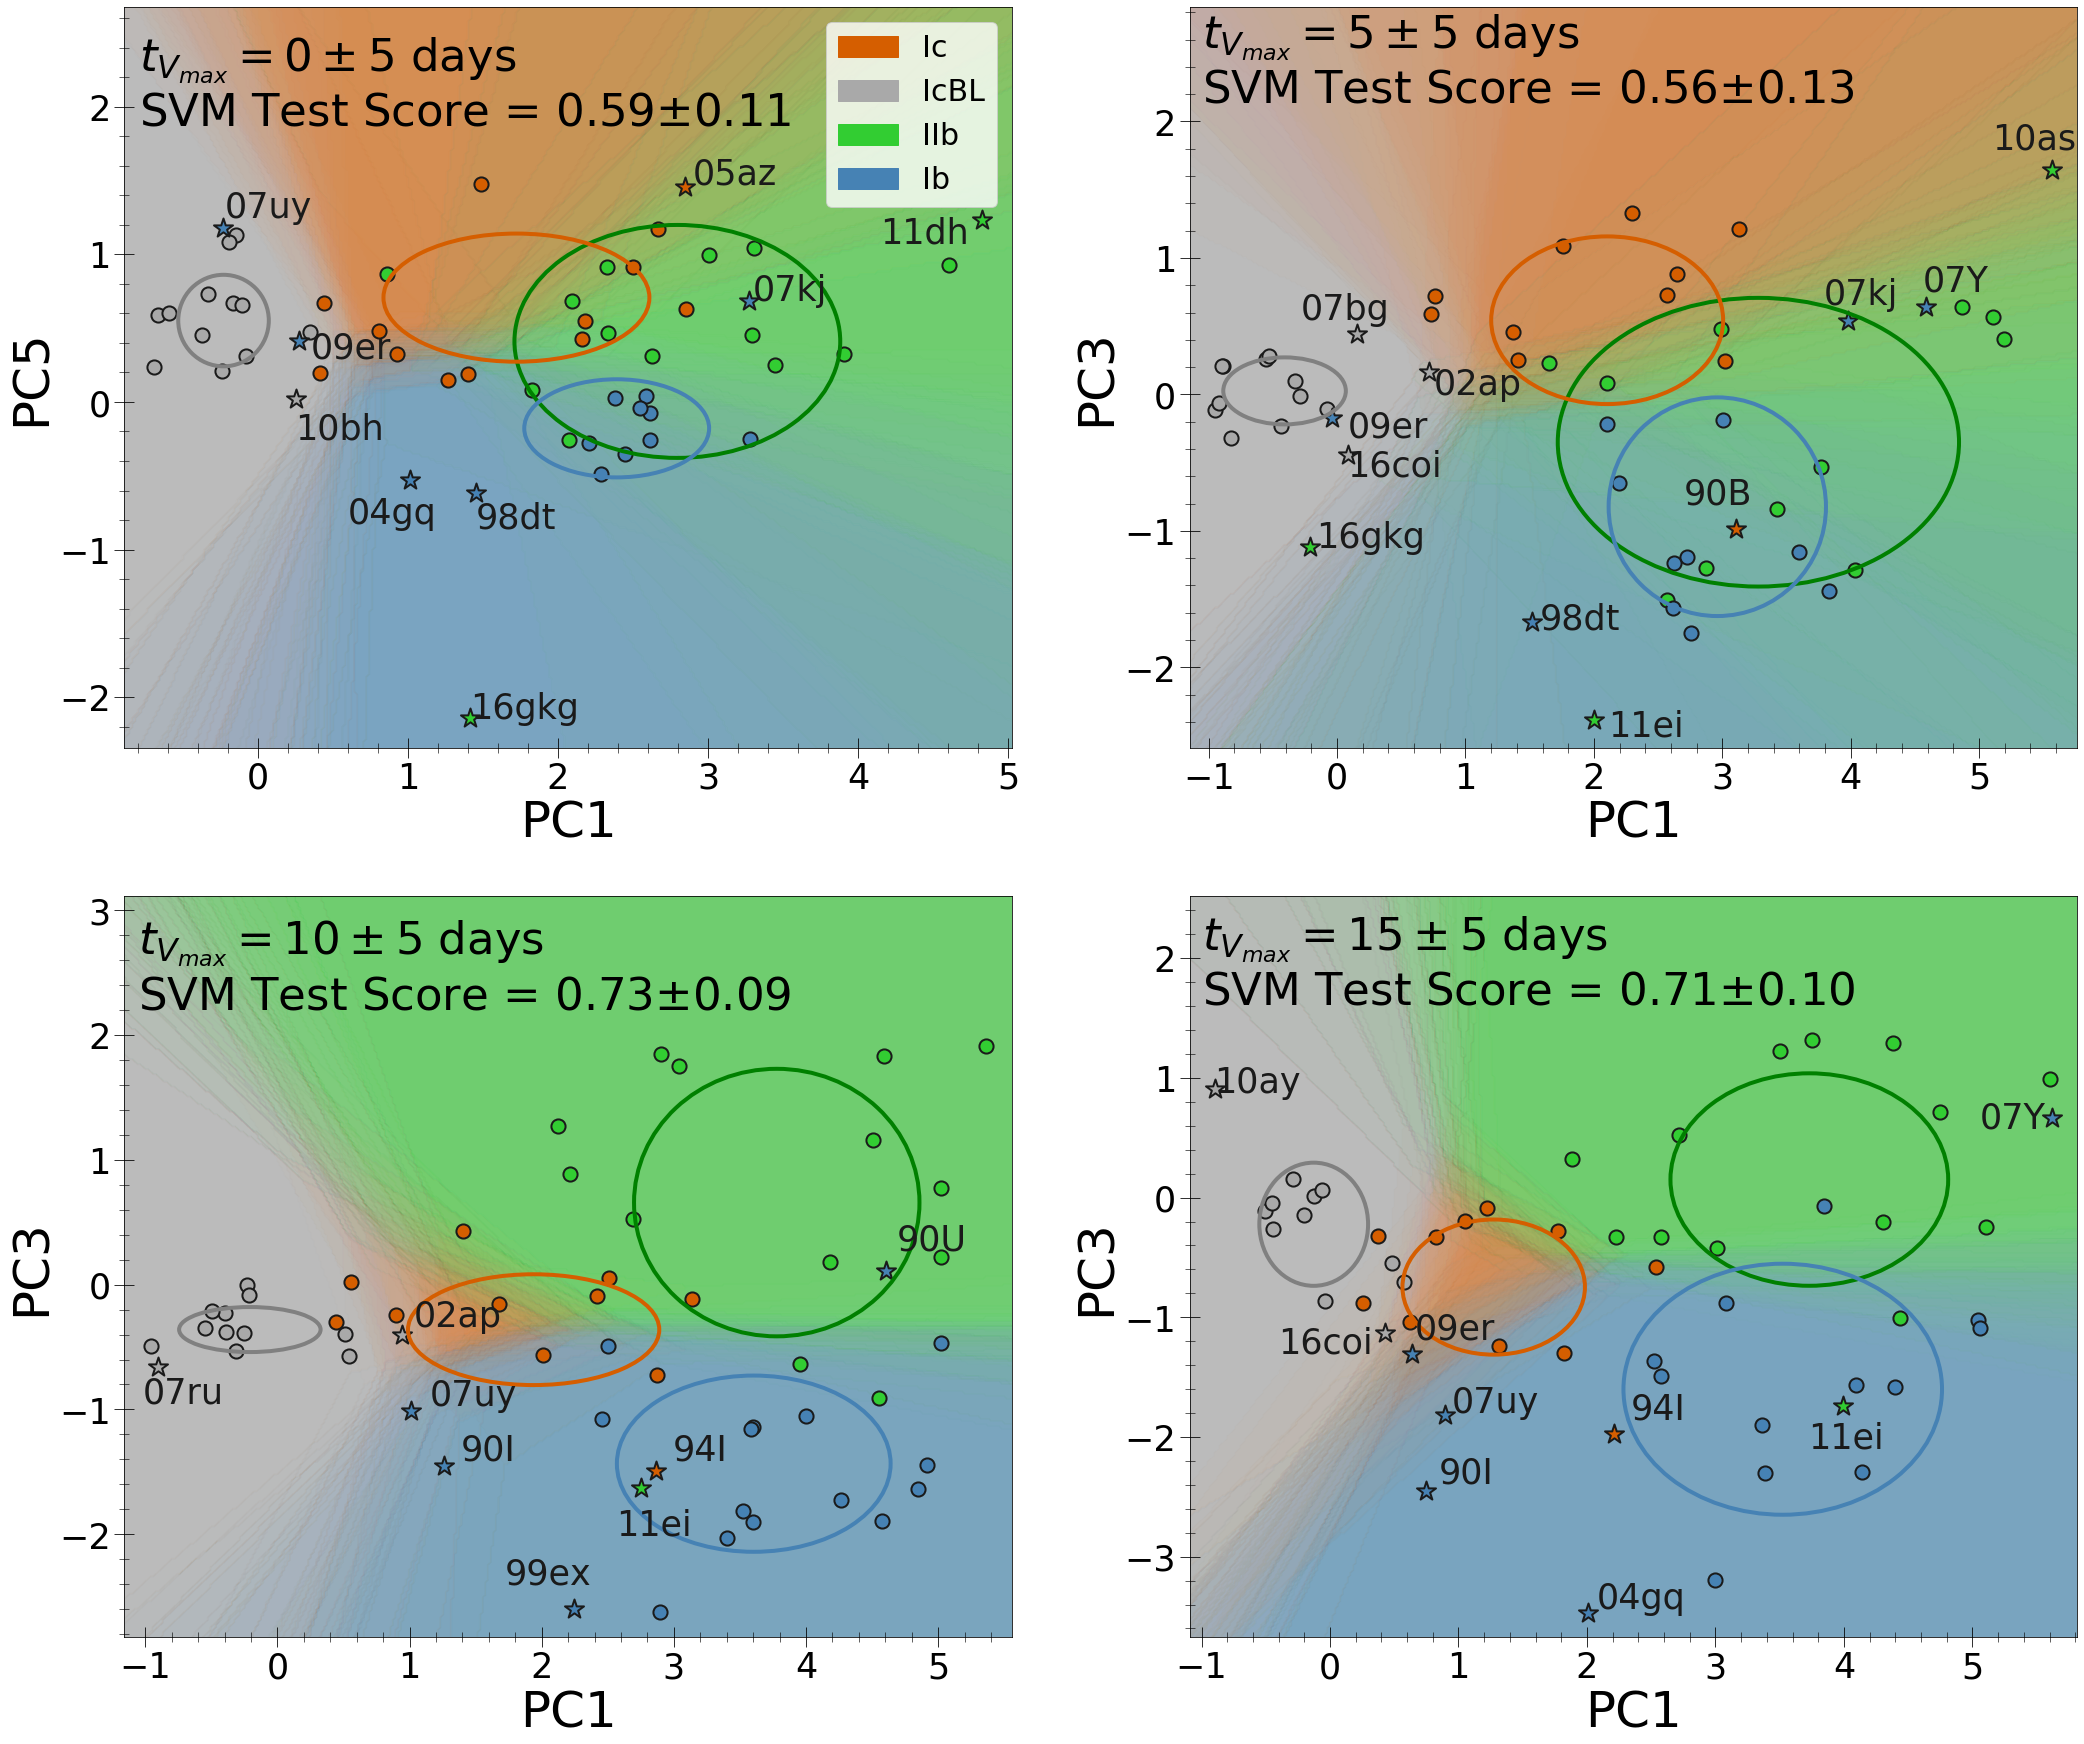

In [28]:
f_all

# PC Time Evolution

The following cells construct a plot that shows the time evolution of the eigenspectra as phase changes.

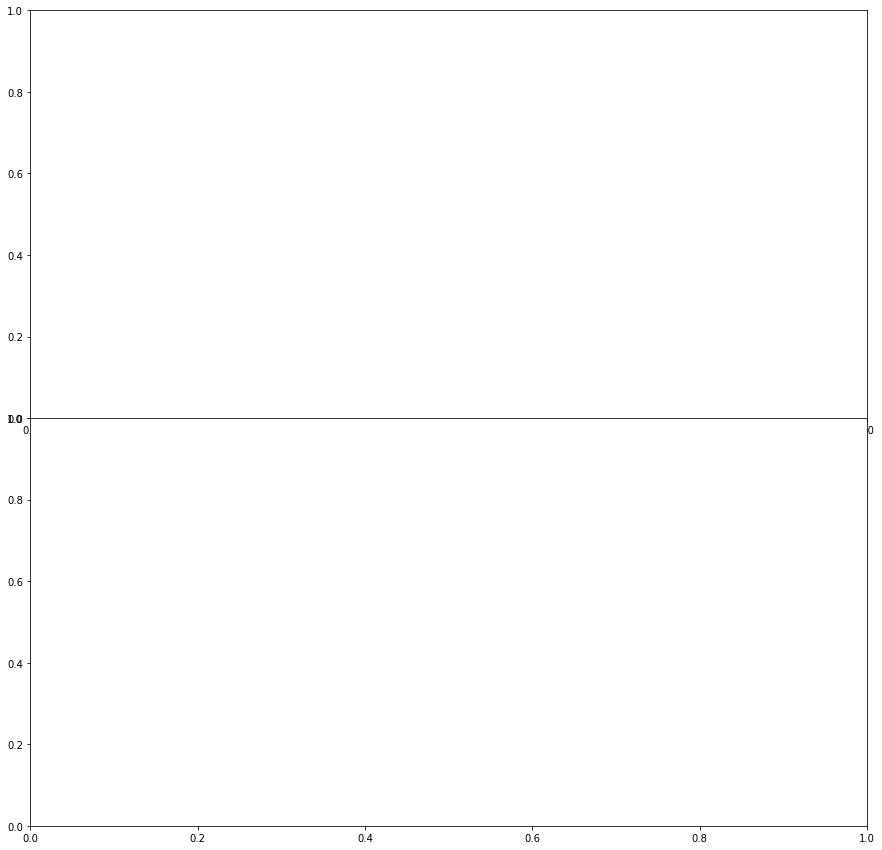

In [29]:
f_all, axs = plt.subplots(2,1,figsize=(15,15),gridspec_kw={'hspace':0})

In [30]:
ax = axs[0]
ax.set_xlim((4000,7000))
ax.set_ylim((-.2,.35))

l1=ax.plot(snidPCA0.wavelengths,snidPCA0.evecs[4]+0.0,color='k',linewidth=4.0, label='PC5, $t_{V_{max}}=0\pm5$')
l2=ax.plot(snidPCA5.wavelengths, snidPCA5.evecs[2]+0.0,'--',color='r',linewidth=4.0, label='PC3, $t_{V_{max}}=5\pm5$')
l3=ax.plot(snidPCA5.wavelengths, snidPCA10.evecs[2]+0.0,'--',color='green',linewidth=4.0, label='PC3, $t_{V_{max}}=10\pm5$')
l4=ax.plot(snidPCA5.wavelengths, snidPCA15.evecs[2]+0.0,'--',color='b',linewidth=4.0, label='PC3, $t_{V_{max}}=15\pm5$')

ax.legend(handles=[l1[0],l2[0],l3[0],l4[0]],fontsize=30, ncol=2)
ax.tick_params(axis='both',which='major', length=20,direction='inout',labelsize=35)
ax.tick_params(axis='both',which='minor', length=10,direction='inout')
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticklabels([])


ax = axs[1]
ax.set_xlim((4000,7000))
ax.set_ylim((-.2,.35))

l1=ax.plot(snidPCA0.wavelengths,snidPCA0.evecs[2]+0.0,color='k',linewidth=4.0, label='PC3, $t_{V_{max}}=0\pm5$')
l2=ax.plot(snidPCA5.wavelengths, snidPCA5.evecs[3]+0.0,'--',color='r',linewidth=4.0, label='PC4, $t_{V_{max}}=5\pm5$')
l3=ax.plot(snidPCA5.wavelengths, snidPCA10.evecs[3]+0.0,'--',color='green',linewidth=4.0, label='PC4, $t_{V_{max}}=10\pm5$')
l4=ax.plot(snidPCA5.wavelengths, snidPCA15.evecs[3]+0.0,'--',color='b',linewidth=4.0, label='PC4, $t_{V_{max}}=15\pm5$')

ax.legend(handles=[l1[0],l2[0],l3[0],l4[0]],fontsize=30,ncol=2)
ax.set_xlabel('Wavelength ($\AA$)',fontsize=50)
ax.tick_params(axis='both',which='major', length=20,direction='inout',labelsize=35)
ax.tick_params(axis='x',which='minor', length=10,direction='inout')
ax.set_yticks([])
ax.set_yticklabels([])

[]

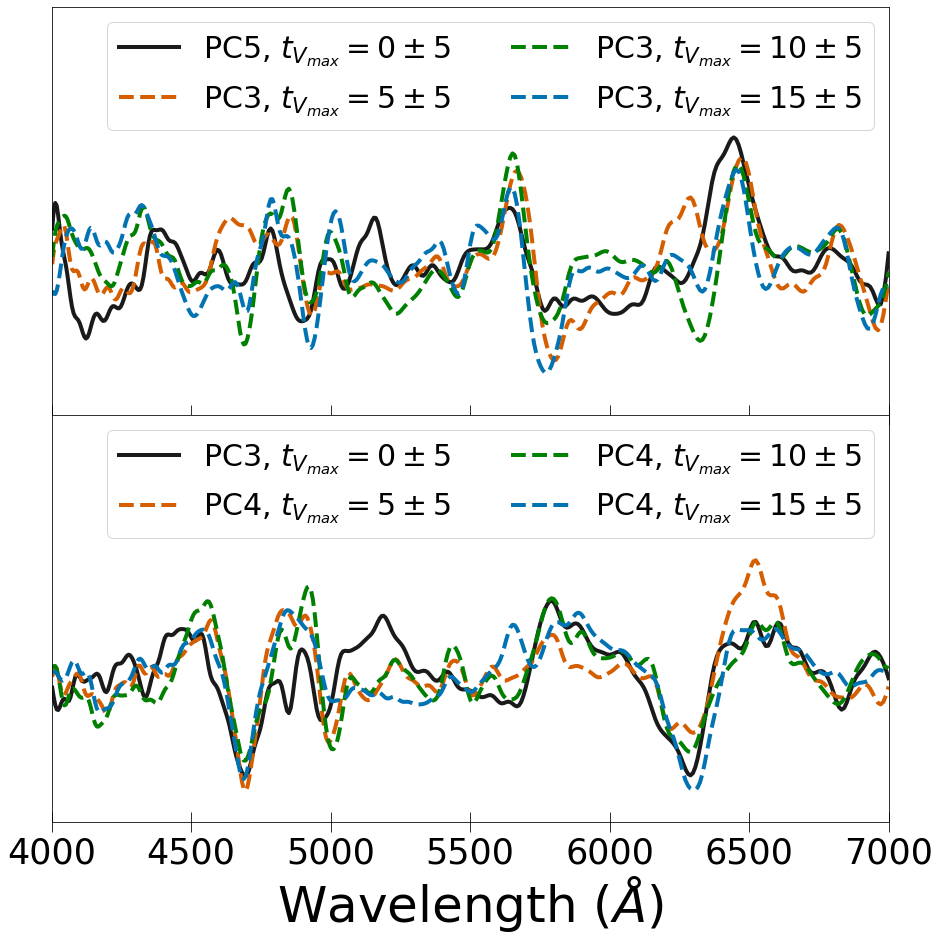

In [31]:
f_all

# PC's vs Mean Templates

In [32]:
from scipy.io.idl import readsav
import pylab as pl
import numpy as np
import os

In [34]:
# NOTE: This requires that the user define an environmental variable
# MEANSPEC which points to a directory containing the mean spectra
# from Liu and Modjaz (links to papers and repositories in README)
meanspec_path = os.environ['MEANSPEC']

KeyError: 'MEANSPEC'

In [32]:
def readtemplate(tp):
    if tp=='IcBL' or tp=='Ic':
        s = readsav(meanspec_path + '/meanspec%s_1specperSN_15_ft.sav'%tp)
    else:
        s = readsav(meanspec_path + '/meanspec%s_1specperSN_15.sav'%tp)
    
    return s

In [33]:
def plotPCs(s, tp, c, ax, eig, ewav, sgn):
    lines = []
    for i,e in enumerate(eig):
        line = ax.plot(ewav, sgn[i]*2*e +5-1.0*i, label="PCA%i"%i,c='k')
        lines.append(line)
        if i:
            ax.fill_between(s.wlog, s.fmean + s.fsdev+ 5-1.0*i,
                            s.fmean - s.fsdev +5-1.0*i, 
                    color = c, alpha = 0.2)
        else:
            ax.fill_between(s.wlog, s.fmean + s.fsdev +5-1.0*i,
                            s.fmean - s.fsdev +5-1.0*i, 
                    color = c, alpha = 0.2, label=tp+' Template')
            
    ax.set_xlim(4000,7000)
    ax.set_xlabel("wavelength ($\AA$)",fontsize=26)
    ax.set_ylim(0, 8)
    return ax, lines

In [34]:
plt.clf()

In [35]:
plt.clf()
snIb = readtemplate('Ib')
snIc = readtemplate('Ic')
snIIb = readtemplate('IIb')
snIcBL = readtemplate('IcBL')

In [36]:
import matplotlib.patches as mpatches
plt.clf()
f, axs = plt.subplots(2,2,figsize=(25,20), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.05, wspace=0.05)
axs[0,0], _ = plotPCs(snIIb, 'IIb',snidPCA15.IIb_color, axs[0,0], snidPCA15.evecs[0:5], snidPCA0.wavelengths,[1,1,1,1,1])
axs[0,1], _ = plotPCs(snIb, 'Ib',snidPCA15.Ib_color, axs[0,1], snidPCA15.evecs[0:5], snidPCA0.wavelengths,[1,1,1,1,1])
axs[1,0], _ = plotPCs(snIcBL, 'IcBL',snidPCA15.IcBL_color, axs[1,0], snidPCA15.evecs[0:5], snidPCA0.wavelengths,[1,1,1,1,1])
axs[1,1], lines = plotPCs(snIc, 'Ic',snidPCA15.Ic_color, axs[1,1], snidPCA15.evecs[0:5], snidPCA0.wavelengths,[1,1,1,1,1])
leg = [el[0] for el in lines]
red_patch = mpatches.Patch(color='steelblue', label='Ib Mean Spec', alpha=0.1)
green_patch = mpatches.Patch(color='limegreen', label='IIb Mean Spec', alpha=0.1)
black_patch = mpatches.Patch(color='darkgrey', label='IcBL Mean Spec', alpha=0.1)
blue_patch = mpatches.Patch(color='r', label='Ic Mean Spec', alpha=0.1)
leg.append(green_patch)
leg.append(black_patch)
leg.append(red_patch)
leg.append(blue_patch)


In [37]:
ymax = 7.8
xmin = 3800

fontsz=35
axs[0,0].set_ylim((0,ymax))
axs[0,0].set_xlabel('')
axs[0,1].set_xlabel('')



ax = axs[0,0]
ax.axvspan(6213, 6366, alpha=0.1, color='k') #H alpha -9000 km/s to -16000 km/s
s = r'$\alpha$'
ax.text((6213+6366)/2.0, ymax + ymax * 0.02, 'H'+s, fontsize=fontsz, horizontalalignment='center')
ax.axvspan(4602, 4715, alpha=0.1, color='k') #H Beta -9000 km/s to-16000 km/s
s = r'$\beta$'
ax.text((4602+4715)/2.0, ymax + ymax * 0.02, 'H'+s, fontsize=fontsz, horizontalalignment='center')
ax.axvspan(5621, 5758, alpha=0.1, color='k') #HeI5876 -6000 km/s to -13000 km/s
ax.text((5621+5758)/2.0, ymax + ymax * 0.02, 'HeI5876', fontsize=fontsz, horizontalalignment='center')

ax = axs[0,1]
ax.axvspan(5621, 5758, alpha=0.1, color='k') #HeI5876 -6000 km/s to -13000 km/s
ax.text((5621+5758)/2.0, ymax + ymax * 0.02, 'HeI5876', fontsize=fontsz, horizontalalignment='center')


axs[0,0].tick_params(axis='both',which='both',labelsize=fontsz, length=20,direction='inout')
axs[0,0].get_yaxis().set_ticks([])
axs[0,1].tick_params(axis='both',which='both',labelsize=fontsz, length=20,direction='inout')
axs[1,0].tick_params(axis='both',which='both',labelsize=fontsz, length=20,direction='inout')
axs[1,0].get_yaxis().set_ticks([])
axs[1,1].tick_params(axis='both',which='both',labelsize=fontsz, length=20,direction='inout')


axs[0,0].set_ylim((0,ymax))
axs[0,0].set_xlim((xmin, 7100))
axs[1,0].set_xlim((xmin,7100))
axs[1,0].set_xlabel('')
axs[1,1].set_xlabel('')


f.text(0.085, 2.0/4.0, 'Relative Flux', verticalalignment='center', rotation='vertical', fontsize=fontsz)
xmax = axs[0,0].get_xlim()[1]

f.text(0.5,0.07, 'Wavelength $(\AA)$', horizontalalignment='center', fontsize=fontsz)

for ax in axs.flatten():
    ax.text(xmin, 5.15, 'PC1', fontsize=50, color='k')
    ax.text(xmin, 4.15, 'PC2', fontsize=50, color='k')
    ax.text(xmin, 3.15, 'PC3', fontsize=50, color='k')
    ax.text(xmin, 2.15, 'PC4', fontsize=50, color='k')
    ax.text(xmin, 1.15, 'PC5', fontsize=50, color='k')
    from matplotlib.ticker import MultipleLocator
    ax.xaxis.set_minor_locator(MultipleLocator(100))
    ax.tick_params(axis='x', which='minor', direction='inout', length=15)
    
axs[0,0].text(xmax-50, ymax-1.7, 'IIb Mean Spectrum $\pm 1\sigma$', fontsize=50, color='limegreen', ha='right')
axs[0,1].text(xmax-50, ymax-1.7, 'Ib Mean Spectrum $\pm 1\sigma$', fontsize=50, color='steelblue', ha='right')
axs[1,0].text(xmax-50, ymax-1.7, 'IcBL Mean Spectrum $\pm 1\sigma$', fontsize=50, color='darkgrey', ha='right')
axs[1,1].text(xmax-50, ymax-1.7, 'Ic Mean Spectrum $\pm 1\sigma$', fontsize=50, color='r', ha='right')

Text(7050,6.1,'Ic Mean Spectrum $\\pm 1\\sigma$')

In [38]:
axs[0,0].text(4000,7.2,'$t_{V_{max}}=15\pm5$',fontsize=35)

Text(4000,7.2,'$t_{V_{max}}=15\\pm5$')

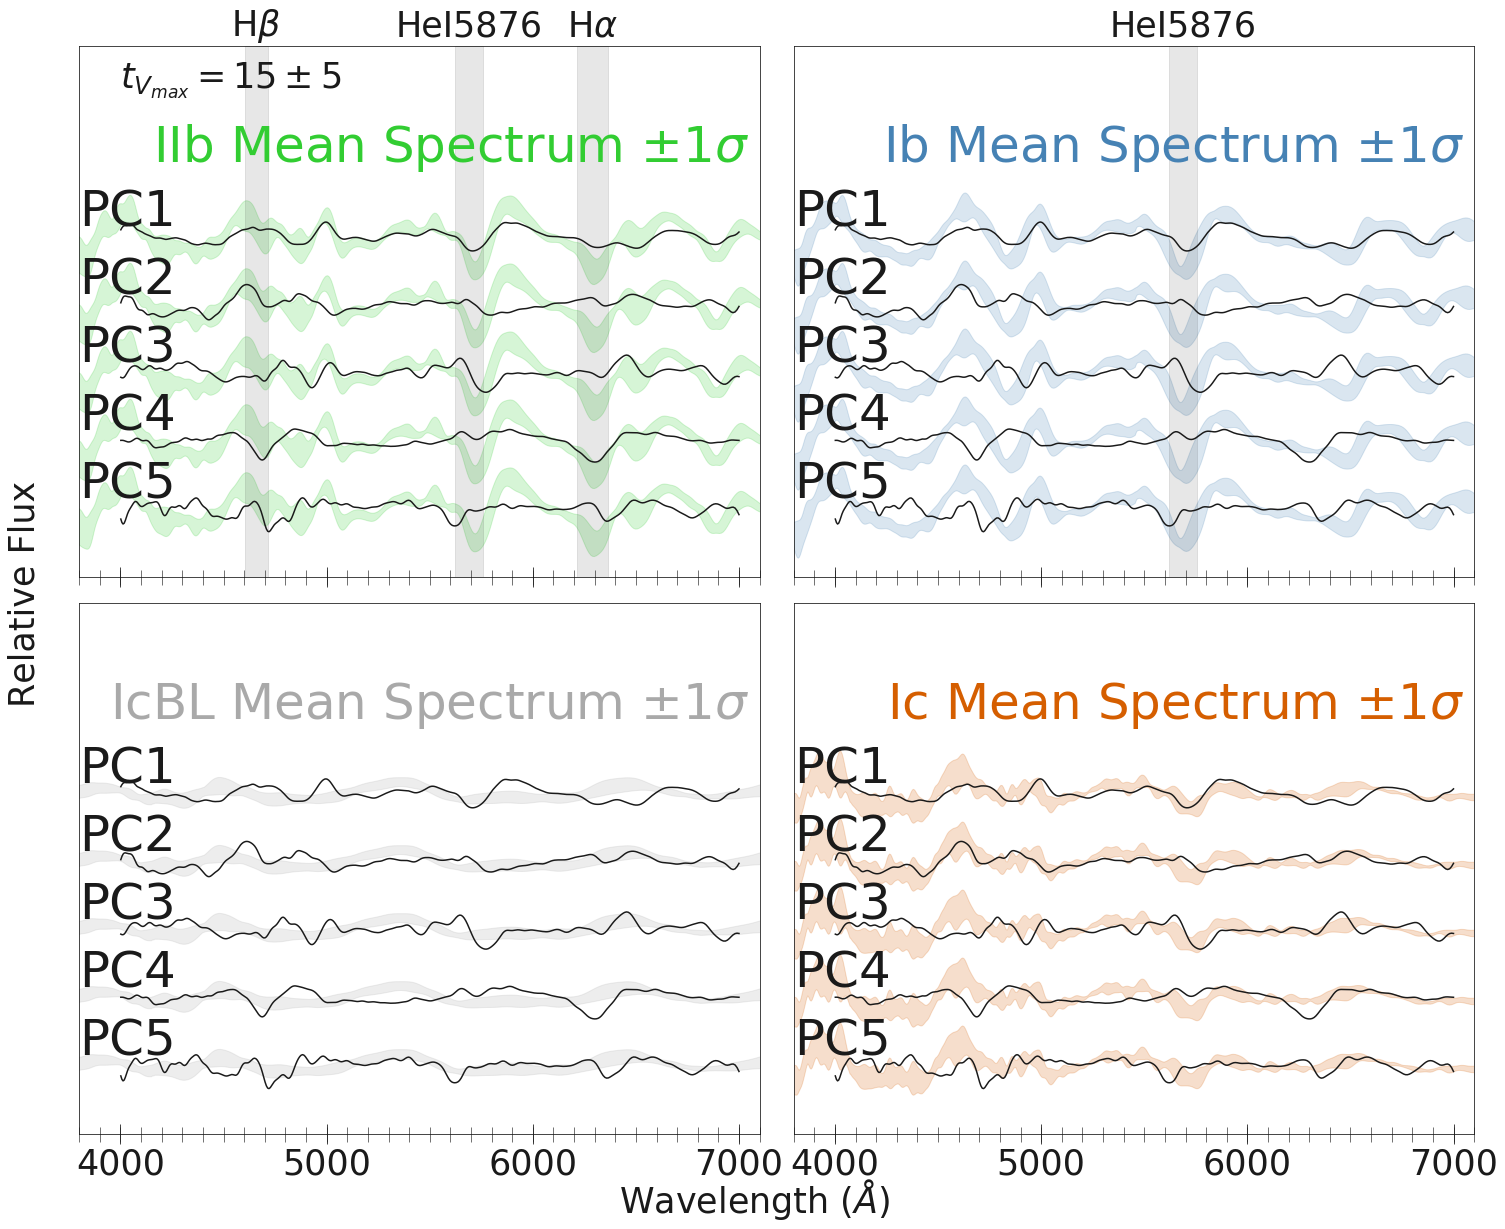

In [39]:
f